# This notebook will be used to test the correctness of my implementation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd

from torchvision import transforms
import torch
from imutils import paths
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torch.nn import BCEWithLogitsLoss, Sigmoid
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import LinearLR, ExponentialLR


import os 
import time 
from tqdm import tqdm


## Testing Encoder block

In [2]:
import sys

sys.path.append("../src")
from encoder import Encoder

In [3]:
import torch

encoder = Encoder(channels=(3, 64, 128, 256, 512, 1024))

In [4]:
print(encoder)

Encoder(
  (encoder_blocks): ModuleList(
    (0): Block(
      (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Block(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Block(
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(256, 256, kernel_

In [5]:

x = torch.randn(1, 3, 572, 572)  # Batch size of 1, 3 input channels, 572x572 image
features = encoder(x)
for f in features:
    print(f.shape)
    

torch.Size([1, 64, 568, 568])
torch.Size([1, 128, 280, 280])
torch.Size([1, 256, 136, 136])
torch.Size([1, 512, 64, 64])
torch.Size([1, 1024, 28, 28])


## Testing Encoder block

In [6]:
from decoder import Decoder

In [7]:
decoder = Decoder(channels=(1024, 512, 256, 128, 64))

In [8]:
print(decoder)

Decoder(
  (upconvs): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (2): ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2))
    (3): ConvTranspose2d(128, 64, kernel_size=(2, 2), stride=(2, 2))
  )
  (decoder_blocks): ModuleList(
    (0): Block(
      (conv1): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1))
      (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
      (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Block(
      (conv1): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1))
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
      (bn2): BatchN

In [9]:
x = features[-1]
x.shape

torch.Size([1, 1024, 28, 28])

In [10]:
# feature_maps = [features[-i] for i in range(2,len(features)+1)]
feature_maps = features[::-1]

In [11]:
for fm in feature_maps:
    print(fm.shape)

torch.Size([1, 1024, 28, 28])
torch.Size([1, 512, 64, 64])
torch.Size([1, 256, 136, 136])
torch.Size([1, 128, 280, 280])
torch.Size([1, 64, 568, 568])


In [12]:
output = decoder(feature_maps[0], feature_maps[1:])
print(output.shape) 

torch.Size([1, 64, 388, 388])


## Testing UNet

In [13]:
from unet import UNet

In [14]:
model = UNet(ouput_dim=(256, 256), encoder_channels=(3, 64, 128, 256, 512, 1024), decoder_channels=(1024, 512, 256, 128, 64))
print(model)

UNet(
  (encoder): Encoder(
    (encoder_blocks): ModuleList(
      (0): Block(
        (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): Block(
        (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU()
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): Block(
        (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
        (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [15]:

x = torch.randn(1, 3, 572, 572)  # Example input tensor
output = model(x)
print(output.shape)  # Expected output shape


torch.Size([1, 1, 256, 256])


## Training unet

In [16]:

IMAGE_DATASET_PATH = "/home/dah/computer_vision/datasets/segmentation_full_body_tik_tok_2615_img/images"
MASK_DATASET_PATH = "/home/dah/computer_vision/datasets/segmentation_full_body_tik_tok_2615_img/masks"

INPUT_IMAGE_HEIGHT = 300
INPUT_IMAGE_WIDTH = 300



image_paths = sorted(list(paths.list_images(IMAGE_DATASET_PATH)))
mask_paths = sorted(list(paths.list_images(MASK_DATASET_PATH)))



In [17]:
image_paths[0:3]

['/home/dah/computer_vision/datasets/segmentation_full_body_tik_tok_2615_img/images/0_00030.png',
 '/home/dah/computer_vision/datasets/segmentation_full_body_tik_tok_2615_img/images/0_00180.png',
 '/home/dah/computer_vision/datasets/segmentation_full_body_tik_tok_2615_img/images/0_00330.png']

In [18]:
mask_paths[0:3]

['/home/dah/computer_vision/datasets/segmentation_full_body_tik_tok_2615_img/masks/0_00030.png',
 '/home/dah/computer_vision/datasets/segmentation_full_body_tik_tok_2615_img/masks/0_00180.png',
 '/home/dah/computer_vision/datasets/segmentation_full_body_tik_tok_2615_img/masks/0_00330.png']

In [19]:
(train_images, test_images,train_masks, test_masks) = train_test_split(image_paths, mask_paths,test_size=0.2, random_state=42)

In [20]:
# train_images

In [21]:
from segmentation_dataset import SegmentationDataset

In [22]:
# define transformations
transforms = transforms.Compose([transforms.ToPILImage(),transforms.Resize((INPUT_IMAGE_HEIGHT,INPUT_IMAGE_WIDTH)),transforms.ToTensor()])
# create the train and test datasets
train_data = SegmentationDataset(image_paths=train_images, mask_paths=train_masks,transforms=transforms)
test_data = SegmentationDataset(image_paths=test_images, mask_paths=test_masks,transforms=transforms)

TRAIN_BATCH_SIZE = 10
TEST_BATCH_SIZE = 10

print(f"[INFO] found {len(train_data)} examples in the training set...")
print(f"[INFO] found {len(test_data)} examples in the test set...")
# create the training and test data loaders
train_loader = DataLoader(train_data, shuffle=True,batch_size=TRAIN_BATCH_SIZE, num_workers=10)
test_loader = DataLoader(test_data, shuffle=False,batch_size=TEST_BATCH_SIZE,num_workers=4)

[INFO] found 2092 examples in the training set...
[INFO] found 523 examples in the test set...


In [23]:
from trainer import UNetTrainer

In [24]:
LR = 1e-2

NUM_EPOCHS = 10

# CPU_USAGE = os.cpu_count() - 4

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# initialize our UNet model
# model = UNet(ouput_dim=(INPUT_IMAGE_HEIGHT,INPUT_IMAGE_WIDTH), encoder_channels = (3, 64, 128, 256, 512),decoder_channels = (512,256, 128, 64)).to(DEVICE)
model = UNet(ouput_dim=(INPUT_IMAGE_HEIGHT,INPUT_IMAGE_WIDTH), encoder_channels = (3, 32,64, 128, 256),decoder_channels = (256, 128, 64, 32)).to(DEVICE)

# initialize loss function and optimizer
loss_func = BCEWithLogitsLoss()
# loss_func = Sigmoid()
# optimizer = SGD(model.parameters(), lr=LR)
optimizer = SGD(model.parameters(), lr=LR, momentum=0.9)
# optimizer = Adam(model.parameters(), lr=LR)

# calculate steps per epoch for training and test set
train_steps = len(train_data) // TRAIN_BATCH_SIZE
test_steps = len(test_data) // TEST_BATCH_SIZE

# scheduler = LinearLR(optimizer, start_factor=LR, end_factor=1e-5, total_iters=NUM_EPOCHS*2) 
scheduler = ExponentialLR(optimizer, gamma=0.9)

In [25]:

trainer = UNetTrainer(model=model, train_loader=train_loader, test_loader=test_loader, loss_func=loss_func, optimizer = optimizer, scheduler = scheduler, device=DEVICE)

In [26]:
history = trainer.train(num_epochs=NUM_EPOCHS)

Epoch 1/10: 100%|██████████| 210/210 [00:29<00:00,  7.18it/s]


Epoch 0: SGD lr=0.0100
Train loss: 0.318938, Test loss: 0.2464


Epoch 2/10: 100%|██████████| 210/210 [00:31<00:00,  6.65it/s]


Epoch 1: SGD lr=0.0090
Train loss: 0.225317, Test loss: 0.2245


Epoch 3/10: 100%|██████████| 210/210 [00:32<00:00,  6.52it/s]


Epoch 2: SGD lr=0.0081
Train loss: 0.203164, Test loss: 0.2006


Epoch 4/10: 100%|██████████| 210/210 [00:33<00:00,  6.27it/s]


Epoch 3: SGD lr=0.0073
Train loss: 0.191167, Test loss: 0.1964


Epoch 5/10: 100%|██████████| 210/210 [00:33<00:00,  6.25it/s]


Epoch 4: SGD lr=0.0066
Train loss: 0.184686, Test loss: 0.2835


Epoch 6/10:   0%|          | 0/210 [00:00<?, ?it/s]

In [ ]:
THRESHOLD = 0.5

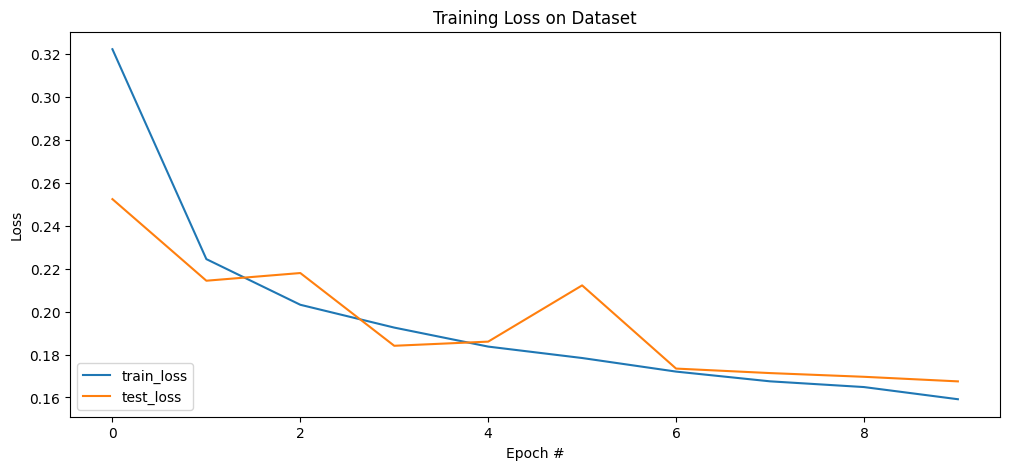

In [ ]:
# plt.style.use("ggplot")
plt.figure(figsize=(12, 5))
plt.plot(history["train_loss"], label="train_loss")
plt.plot(history["test_loss"], label="test_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

In [ ]:
from plots import make_predictions

In [ ]:
test_images[0]


'/home/dah/computer_vision/datasets/segmentation_full_body_tik_tok_2615_img/images/95_00180.png'

In [ ]:
test_masks[0]

'/home/dah/computer_vision/datasets/segmentation_full_body_tik_tok_2615_img/masks/95_00180.png'

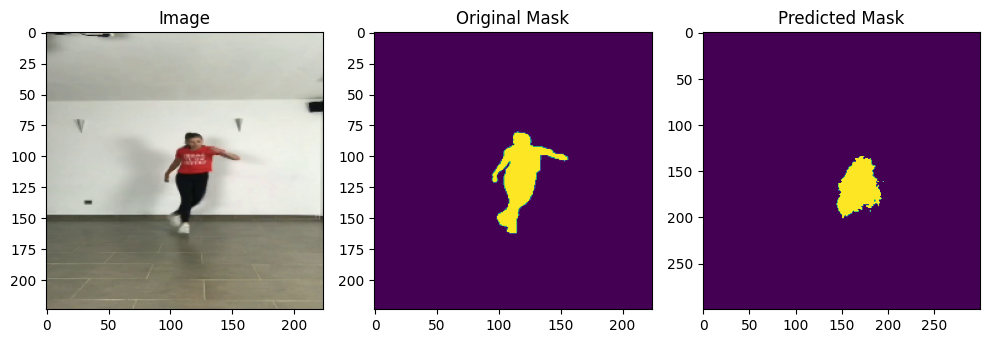

In [ ]:
make_predictions(model=model, image_path = test_images[5], mask_path=test_masks[5], input_image_height=224, input_image_width=224, device = "cuda",threshold = 0.5)
